# 1. Package Load

In [5]:
import pandas as pd
import numpy as np

# 2. Data Preparation

## 2.1 Load Data

In [6]:
df = pd.read_csv('XYZloan_default_selected_vars.csv')
df.tail()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [8]:
df.dtypes
print(df.dtypes)

Unnamed: 0        int64
Unnamed: 0.1      int64
id                int64
loan_default      int64
AP001             int64
                 ...   
CD170           float64
CD172           float64
CD173           float64
MB005           float64
MB007            object
Length: 89, dtype: object


## 1.2 Split Data into train and test data

In [9]:
APs = ['AP001', 'AP003', 'AP008']
CRs = ['CR009', 'CR015', 'CR019']
PAs = ['PA022', 'PA023', 'PA029']
TDs = ['TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
var = APs + CRs + PAs + TDs
target = ['loan_default']
df = df[var + target]
df

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,31,1,3,35807,4,2,-1.0,-1.0,-98.0,1,4,1,5,1,2,1
1,27,1,4,7254,6,11,-1.0,-1.0,-98.0,2,3,1,3,1,2,0
2,33,4,2,30377,2,3,-1.0,-1.0,-98.0,2,4,1,5,1,1,0
3,34,4,5,0,5,8,-1.0,-1.0,-98.0,0,0,0,0,0,1,0
4,47,1,4,0,6,11,-99.0,-99.0,-99.0,2,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,39,1,3,16716,5,6,-1.0,-1.0,-98.0,2,2,0,4,0,3,0
79996,31,4,4,3388,5,5,-1.0,-1.0,-98.0,0,2,0,2,0,0,0
79997,37,1,3,0,3,6,-1.0,-1.0,-98.0,1,1,2,1,2,2,0
79998,38,1,2,20200,4,5,-1.0,-1.0,-98.0,0,0,0,0,0,0,0


In [10]:
df.isnull().sum()

AP001             0
AP003             0
AP008             0
CR009             0
CR015             0
CR019             0
PA022           381
PA023           381
PA029           381
TD001             0
TD005             0
TD006             0
TD009             0
TD010             0
TD014             0
loan_default      0
dtype: int64

In [11]:
df = df[df['PA022'].notnull()]
df = df[df['PA023'].notnull()]
df = df[df['PA029'].notnull()]

In [12]:
target = df['loan_default']
del df['loan_default']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_X,test_X,train_y,test_y = train_test_split(df,target,test_size=0.2,shuffle=True)
train = pd.concat([train_X, train_y], axis = 1)
test = pd.concat([test_X, test_y], axis = 1)

# 3. EDA for Train Data

## 3.1 AP001, AP003, AP008

- AP001 - YR_AGE - Numeric - Application, with range from 20 to 56
- AP003 - CODE_EDUCATION - Numeric - Application, with range from 1 to 6
- AP008 - FLAG_IP_CITY_NOT_APPL_CITY - Numeric - Application, with range from 1 to 5

As AP003 (Education) and AP008 (City) should be categorical variables, they are tranform to categorical variables here.

In [14]:
train['AP003'] = train['AP003'].astype('category',copy=False)
train['AP008'] = train['AP008'].astype('category',copy=False)

In [15]:
EDA_APs = ('AP001','AP003','AP008')

Explore the relationship between X and Y

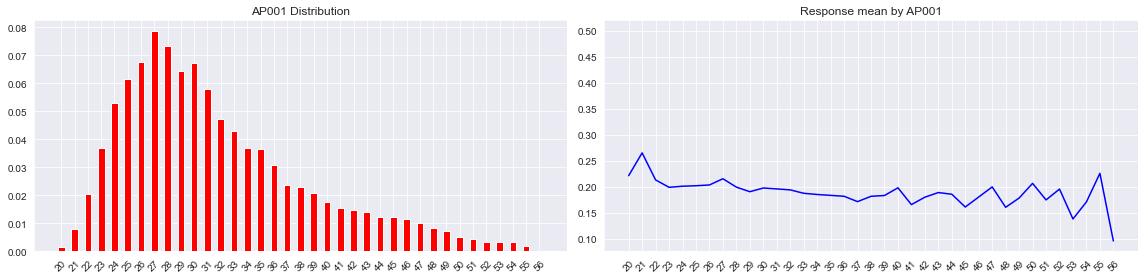

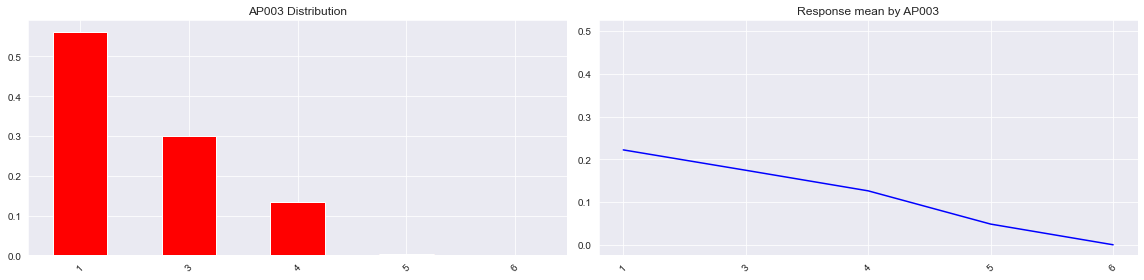

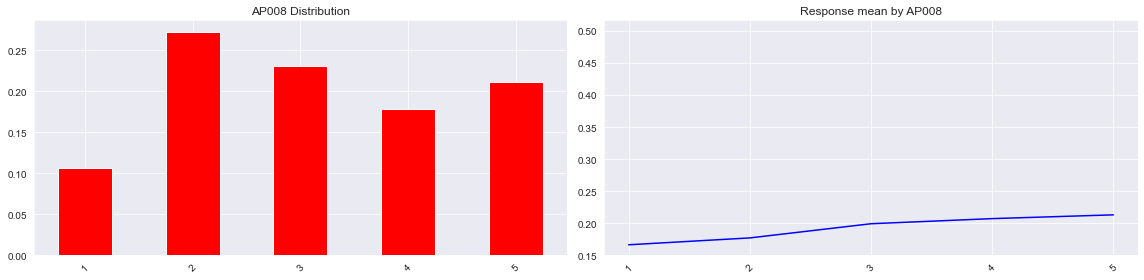

In [16]:
def plot_X_and_Y(var):
    import matplotlib
    import matplotlib.pyplot as plt

    z= train.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    #plt.bar(ind, y_mean, width, color='b')
    plt.plot(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in EDA_APs:
    plot_X_and_Y(i)  

- AP001: From the perspective of age, the popultaion is concentrated between 24 and 31 years old. People aged 27 accounted for the most (8%). The loan default rate decreases slowly with the age increases.
- AP003: From the perspective of education, there are more than 50% of people with education level 1. With the increase of education level, the number of people gradually decreases, with the loan default rate decreases as well
- AP008: From the perspective of city, city 2 accounts for the largest part (~25%). The default rate is higher with city 4 and 5

## 3.2 CR009, CR015, CR019

- CR009 - AMT_LOAN_TOTAL - Numeric - Credit Bureau
- CR015 - MONTH_CREDIT_CARD_MOB_MAX - Numeric - Credit Bureau
- CR019 - SCORE_SINGLE_DEBIT_CARD_LIMIT - Numeric - Credit Bureau

As for CR009 (AMT_LOAN_TOTAL), there are numbers of different values. To make the ditribution more clear, here CR009 is divided into 5 groups and changed to categorical variable.

In [17]:
train['CR009_C'] = pd.cut(train['CR009'],5,duplicates='drop')

In [18]:
EDA_CRs = ('CR009_C','CR015','CR019')

Explore the relationship between X and Y

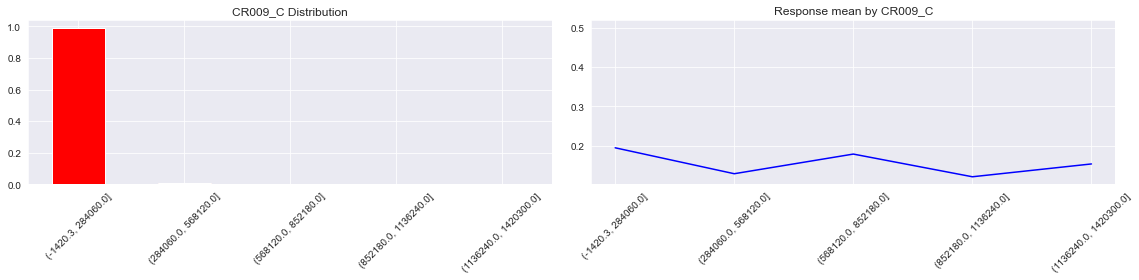

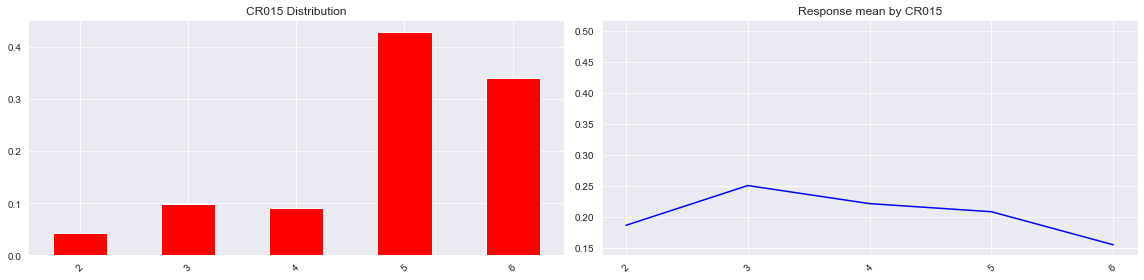

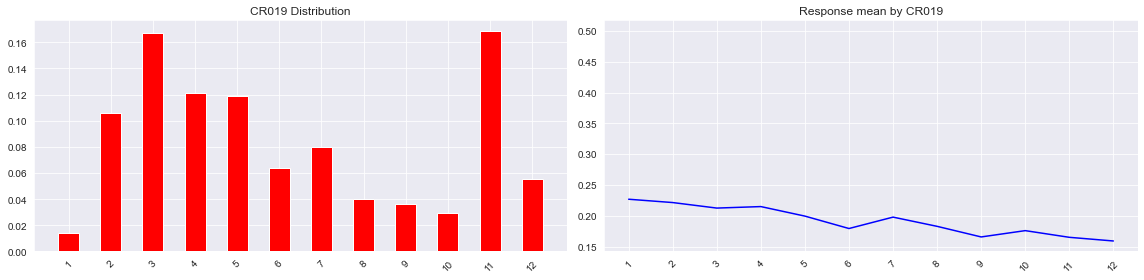

In [19]:
for i in EDA_CRs:
    plot_X_and_Y(i)  

- CR009: From the perspective of loan amount, the amout is concentrated below 284,060. The default rate is also the highest in this range
- CR015: From the perspective of MONTH_CREDIT_CARD_MOB_MAX (the number of months that have completed since the loan origination Date), about 40% of population has the MOB of 5. People whose MOB is 3 has the hightest default rate
- CR019: From the perspective of SCORE_SINGLE_DEBIT_CARD_LIMIT, the population is concentrated at score 3 and 11. The default rate is decreaing as the score increasing 

## 3.3 PA022, PA023, PA029

- PA022 - DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL - Numeric - Call Detail
- PA023 - BTW_APPLICATION_AND_FIRST_COLLECTION_CALL - Numeric - Call Detail
- PA029 - AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS - Numeric - Call Detail

As for CR009 (AMT_LOAN_TOTAL), there are numbers of different values. To make the ditribution more clear, here - CR009 is divided into 5 groups and changed to categorical variable.

In [20]:
train['PA022_C'] = pd.cut(train['PA022'],5,duplicates='drop')
train['PA023_C'] = pd.cut(train['PA023'],5,duplicates='drop')
train['PA029_C'] = pd.cut(train['PA029'],5,duplicates='drop')

In [21]:
EDA_PAs = ('PA022_C','PA023_C','PA029_C')

Explore the relationship between X and Y

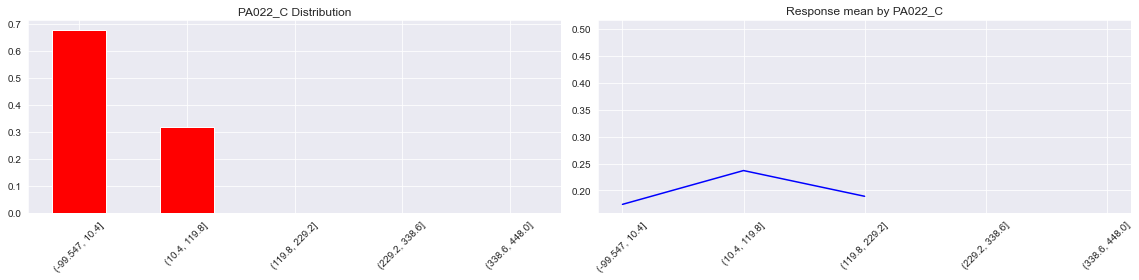

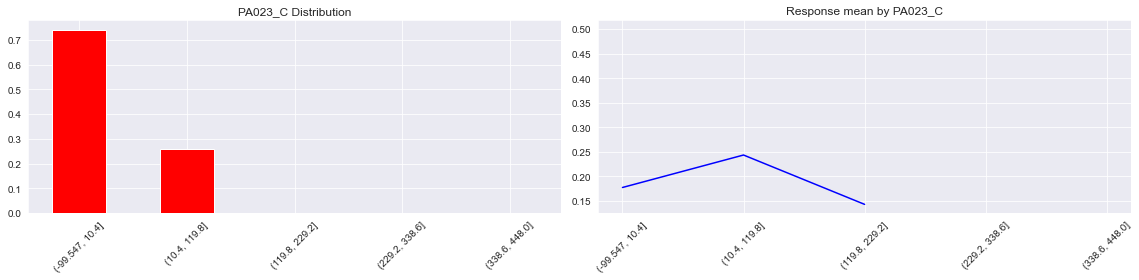

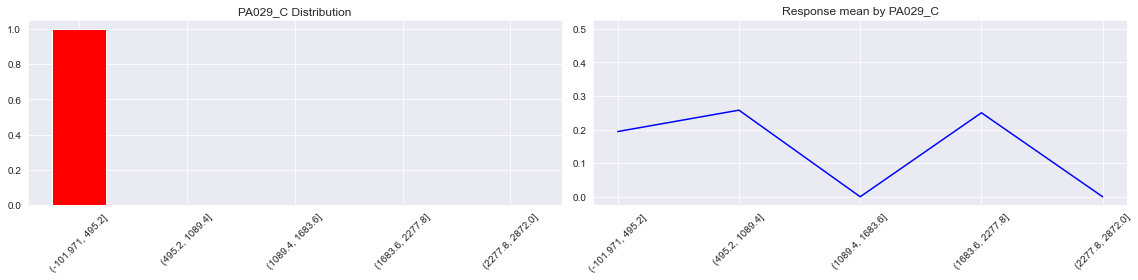

In [22]:
for i in EDA_PAs:
    plot_X_and_Y(i)  

- PA022: From the perspective of days between application and first collection or high risk call, the amount is concentrated between -99.547~10.4 (~70%).The highest default rate is within range 10.4~119.8
- PA023: From the perspective of days between application and first collection, the amount is concentrated between -99.547~10.4 (~70%).The hightest default rate is within range 10.4~119.8
- PA029: From the perspective of average length of collection or high risk inbound calls, the population is concentrated at -101.871~495.2 (99%). The highest default rate is within range 1591.4~2014.0

## 3.4 TD001, TD005, TD006, TD009, TD010, TD014

- TD001 - TD_CNT_QUERY_LAST_7Day_P2P - Numeric - Credit Center
- TD005 - TD_CNT_QUERY_LAST_1MON_P2P - Numeric - Credit Center
- TD006 - TD_CNT_QUERY_LAST_1MON_SMALL_LOAN - Numeric - Credit Center
- TD009 - TD_CNT_QUERY_LAST_3MON_P2P - Numeric - Credit Center
- TD010 - TD_CNT_QUERY_LAST_3MON_SMALL_LOAN - Numeric - Credit Center
- TD014 - TD_CNT_QUERY_LAST_6MON_SMALL_LOAN - Numeric - Credit Center

As for CR009 (AMT_LOAN_TOTAL), there are numbers of different values. To make the ditribution more clear, here - CR009 is divided into 5 groups and changed to categorical variable.

In [23]:
EDA_TDs = ('TD001','TD005','TD006','TD009','TD010','TD014')

Explore the relationship between X and Y

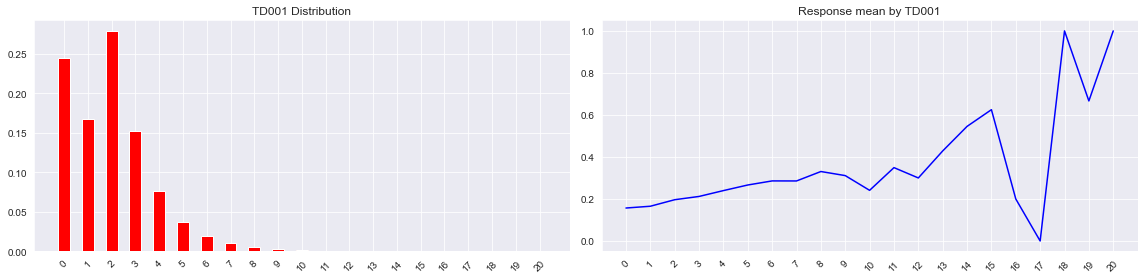

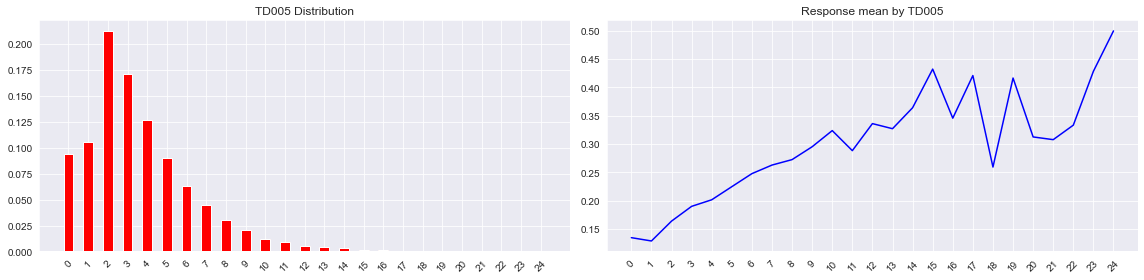

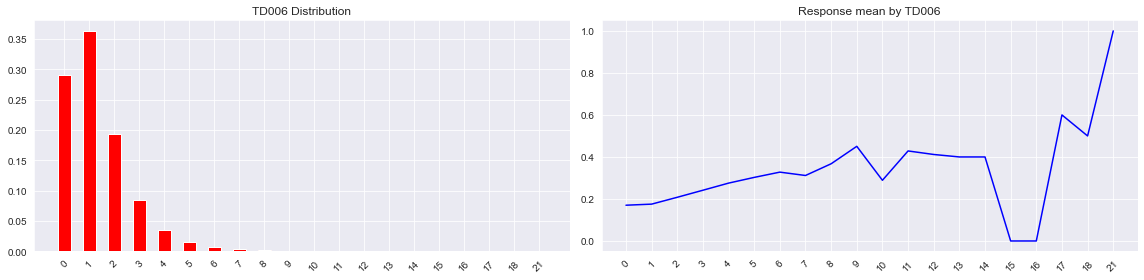

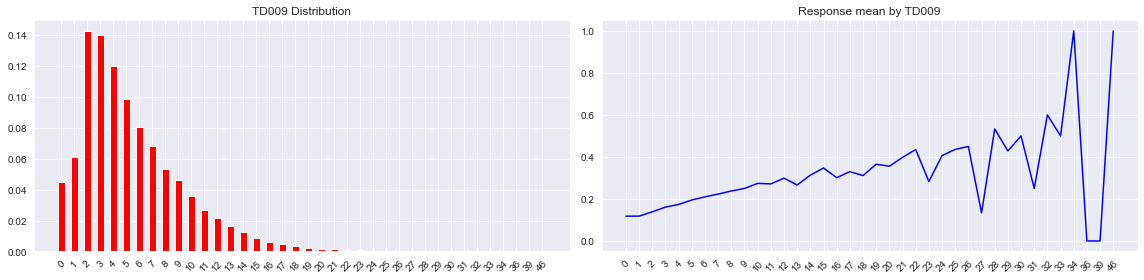

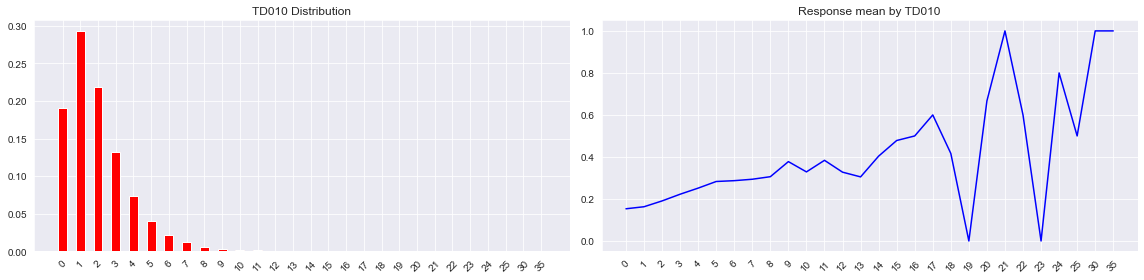

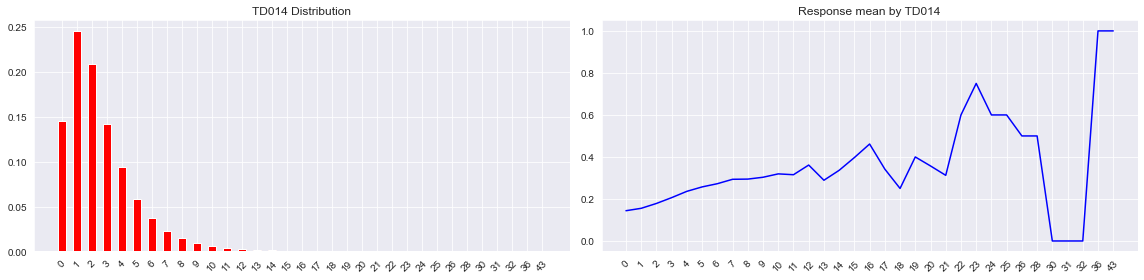

In [24]:
for i in EDA_TDs:
    plot_X_and_Y(i)  

- TD001: From the perspective of the count of query of P2P from last 7 days to today, the numbers are concentrated between 0~3, with 2 the highest (~25%). The default rate overall is increasing except for 17
- TD005: From the perspective of the count of query of P2P from last one month to today, the numbers are concentrated between 0~5, with 2 the highest (~20%). The default rate overall is increasing except for 18 and 20
- TD006: From the perspective of count of query of small loan from last one month untill today, the numbers are concentrated between 0~2, with 1 the highest (~35%). The default rate overall is increasing except for 20.
- TD009: From the perspective of count of query of P2P from last three months to today, the numbers are concentrated between 0~8, with 2 the highest (14%). The default rate overall is increasing except 36~39 
- TD010: From the perspective of count of query of small loan from last three months to today, the numbers are concentrated between 0~3, with 1 the highest (~30%). The default rate overall is increasing,but fluctuated greatly within 19~26
- TD014: From the perspective of count of query of small loan from last six months to today, the numbers are concentrated between 0~3, with 1 the highest (~25%). The default rate overall is increasing except 26, 30-32

# 4. Feature Engineering - WOE

In [25]:
#! pip install category_encoders

In [26]:
import category_encoders as ce
ec = ce.WOEEncoder()
train_woe= train[['loan_default','AP001','AP003', 'AP008','CR009_C', 'CR015', 'CR019','PA022_C', 'PA023_C', 'PA029_C','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]
var_c = ('AP003', 'AP008','CR009_C','PA022_C', 'PA023_C', 'PA029_C')

In [27]:
for i in var_c:
    X = train_woe[i]
    y = train_woe['loan_default']
    x_WOE = ec.fit(X, y)
    x_cleaned = ec.transform(X).round(2)
    df_woe = pd.DataFrame()
    df_woe[i] = train_woe[i]
    df_woe[i+'_woe'] = x_cleaned
    df_woe = df_woe.drop_duplicates()
    train_woe = pd.merge(train_woe, df_woe, on = i, how = 'left')

In [28]:
train_woe.head()

,loan_default,AP001,AP003,AP008,CR009_C,CR015,CR019,PA022_C,PA023_C,PA029_C,...,TD006,TD009,TD010,TD014,AP003_woe,AP008_woe,CR009_C_woe,PA022_C_woe,PA023_C_woe,PA029_C_woe
0,1,45,1,1,"(-1420.3, 284060.0]",5,3,"(-99.547, 10.4]","(-99.547, 10.4]","(-101.971, 495.2]",...,1,5,3,5,0.17,-0.19,0.0,-0.13,-0.11,-0.0
1,1,39,3,2,"(-1420.3, 284060.0]",5,10,"(-99.547, 10.4]","(-99.547, 10.4]","(-101.971, 495.2]",...,0,5,0,0,-0.13,-0.11,0.0,-0.13,-0.11,-0.0
2,0,25,3,4,"(-1420.3, 284060.0]",2,4,"(10.4, 119.8]","(10.4, 119.8]","(-101.971, 495.2]",...,2,17,8,9,-0.13,0.08,0.0,0.25,0.29,-0.0
3,0,30,1,4,"(-1420.3, 284060.0]",3,3,"(-99.547, 10.4]","(-99.547, 10.4]","(-101.971, 495.2]",...,1,5,1,1,0.17,0.08,0.0,-0.13,-0.11,-0.0
4,0,24,3,2,"(-1420.3, 284060.0]",5,9,"(-99.547, 10.4]","(-99.547, 10.4]","(-101.971, 495.2]",...,0,3,1,1,-0.13,-0.11,0.0,-0.13,-0.11,-0.0


# 5. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

First, specify the model.

In [30]:
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

In [31]:
feature = ['AP001', 'AP003_woe', 'AP008_woe','CR009_C_woe', 'CR015', 'CR019','PA022_C_woe', 'PA023_C_woe', 'PA029_C_woe','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

In [32]:
train_woe[feature]

,AP001,AP003_woe,AP008_woe,CR009_C_woe,CR015,CR019,PA022_C_woe,PA023_C_woe,PA029_C_woe,TD001,TD005,TD006,TD009,TD010,TD014
0,45,0.17,-0.19,0.0,5,3,-0.13,-0.11,-0.0,2,5,1,5,3,5
1,39,-0.13,-0.11,0.0,5,10,-0.13,-0.11,-0.0,2,5,0,5,0,0
2,25,-0.13,0.08,0.0,2,4,0.25,0.29,-0.0,2,5,2,17,8,9
3,30,0.17,0.08,0.0,3,3,-0.13,-0.11,-0.0,2,3,1,5,1,1
4,24,-0.13,-0.11,0.0,5,9,-0.13,-0.11,-0.0,2,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63690,25,-0.13,-0.11,0.0,4,2,-0.13,-0.11,-0.0,4,9,4,9,4,4
63691,28,-0.51,0.03,0.0,6,8,-0.13,-0.11,-0.0,3,7,1,8,2,2
63692,40,0.17,0.08,0.0,4,5,-0.13,-0.11,-0.0,2,3,1,5,2,3
63693,34,-0.51,-0.19,0.0,6,11,0.25,0.29,-0.0,2,3,1,11,3,4


Then, train the model.

In [33]:
# Then, train the model.
dtree.fit(train_woe[feature],train_woe['loan_default'])

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

Show the Importance of the "key questions" with the "variable importance"

In [34]:
importances = pd.DataFrame({'feature': train_woe[feature].columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009,0.394
1,AP003_woe,0.256
4,CR015,0.105
14,TD014,0.064
11,TD006,0.036
10,TD005,0.034
7,PA023_C_woe,0.031
0,AP001,0.019
6,PA022_C_woe,0.019
9,TD001,0.012


<AxesSubplot:xlabel='feature'>

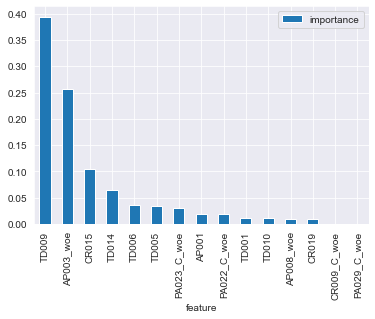

In [35]:
importances.plot.bar(x='feature')

TD009, AP003 and CR015 are 3 most important predictive variables. So the count of query of P2P from last three months to today, education level, and the number of months that have completed since the loan origination Date influence daulft rates most.

# 6. Test data preparation

## 6.1 Data Type

In [36]:
test['AP003'] = test['AP003'].astype('category',copy=False)
test['AP008'] = test['AP008'].astype('category',copy=False)

In [37]:
test['CR009_C'] = pd.cut(test['CR009'],bins = [-1420.3,284060.0,568120.0,852180.0,1136240.0,1420300.0],duplicates='drop')
test['CR009_C'] = test['CR009_C'].astype('category',copy=False)

In [38]:
test['PA022_C'] = pd.cut(test['PA022'],bins = [-99.544,9.8,118.6,227.4,336.2,445],duplicates='drop')
test['PA022_C'] = test['PA022_C'].astype('category',copy=False)

In [39]:
test['PA023_C'] = pd.cut(test['PA023'],bins = [-99.544,9.8,118.6,227.4,336.2,445],duplicates='drop')
test['PA023_C'] = test['PA023_C'].astype('category',copy=False)

In [40]:
test['PA029_C'] = pd.cut(test['PA029'],bins = [-101.971,495.2,1089.4,1683.6,2277.8,2872.0],duplicates='drop')
test['PA029_C'] = test['PA029_C'].astype('category',copy=False)

## 6.2 WOE

In [41]:
import category_encoders as ce
ec = ce.WOEEncoder()
test_woe= test[['loan_default','AP001','AP003', 'AP008','CR009_C', 'CR015', 'CR019','PA022_C', 'PA023_C', 'PA029_C','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]
var_c_t = ('AP003', 'AP008','CR009_C','PA022_C', 'PA023_C', 'PA029_C')

In [42]:
for i in var_c_t:
    X = test_woe[i]
    y = test_woe['loan_default']
    x_WOE = ec.fit(X, y)
    x_cleaned = ec.transform(X).round(2)
    df_woe = pd.DataFrame()
    df_woe[i] = test_woe[i]
    df_woe[i+'_woe'] = x_cleaned
    df_woe = df_woe.drop_duplicates()
    test_woe = pd.merge(test_woe, df_woe, on = i, how = 'left')

In [43]:
test_woe.head()

,loan_default,AP001,AP003,AP008,CR009_C,CR015,CR019,PA022_C,PA023_C,PA029_C,...,TD006,TD009,TD010,TD014,AP003_woe,AP008_woe,CR009_C_woe,PA022_C_woe,PA023_C_woe,PA029_C_woe
0,1,28,1,5,"(-1420.3, 284060.0]",5,2,"(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]",...,5,6,6,7,0.16,0.02,0.01,-0.16,-0.13,-0.0
1,0,39,3,5,"(-1420.3, 284060.0]",6,7,"(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]",...,0,2,0,0,-0.12,0.02,0.01,-0.16,-0.13,-0.0
2,0,24,1,3,"(-1420.3, 284060.0]",3,2,"(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]",...,1,2,1,2,0.16,-0.06,0.01,-0.16,-0.13,-0.0
3,0,37,3,5,"(-1420.3, 284060.0]",5,6,"(9.8, 118.6]","(9.8, 118.6]","(-101.971, 495.2]",...,1,7,2,4,-0.12,0.02,0.01,0.29,0.33,-0.0
4,0,32,1,2,"(-1420.3, 284060.0]",3,5,"(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]",...,0,2,1,1,0.16,-0.03,0.01,-0.16,-0.13,-0.0


# 7. Prediction

In [44]:
predictions = dtree.predict(test_woe[feature][0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
dtree.predict_proba(test_woe[feature][0:10])

array([[0.72715573, 0.27284427],
       [0.95146379, 0.04853621],
       [0.8495361 , 0.1504639 ],
       [0.7904401 , 0.2095599 ],
       [0.8495361 , 0.1504639 ],
       [0.85819715, 0.14180285],
       [0.88963211, 0.11036789],
       [0.76447219, 0.23552781],
       [0.88963211, 0.11036789],
       [0.79458972, 0.20541028]])

# 8. ROC

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = dtree.predict_proba(test_woe[feature])[:,1]
roc_auc_value = roc_auc_score(test_woe['loan_default'],y_pred)
roc_auc_value

0.631514510619429

In [47]:
fpr, tpr, _ = roc_curve(test_woe['loan_default'], y_pred)
[fpr,tpr]

[array([0.00000000e+00, 6.97458153e-04, 8.52448853e-04, 1.39491631e-03,
        3.17730936e-03, 4.72721637e-03, 6.12213267e-03, 9.45443273e-03,
        1.00743955e-02, 1.01518909e-02, 1.43366398e-02, 1.43366398e-02,
        1.54215747e-02, 4.30099194e-02, 4.68846869e-02, 5.03719777e-02,
        5.71915685e-02, 5.75790453e-02, 7.74178549e-02, 8.07501550e-02,
        8.91971482e-02, 1.12833230e-01, 1.29727216e-01, 1.32594544e-01,
        1.75991940e-01, 1.76146931e-01, 2.03192808e-01, 2.16676999e-01,
        2.23264104e-01, 2.52557347e-01, 2.78673280e-01, 2.80765654e-01,
        2.87352759e-01, 2.97194668e-01, 3.01689399e-01, 3.51596404e-01,
        4.34826410e-01, 4.58539988e-01, 4.77681339e-01, 4.93490391e-01,
        5.23636082e-01, 5.37430254e-01, 6.23062616e-01, 6.24147551e-01,
        6.33756975e-01, 6.33834470e-01, 6.64367638e-01, 6.91336020e-01,
        7.33183509e-01, 7.68211407e-01, 7.78595784e-01, 7.78750775e-01,
        8.06494110e-01, 8.08508989e-01, 8.91506510e-01, 9.439708

In [48]:
import matplotlib.pyplot as plt

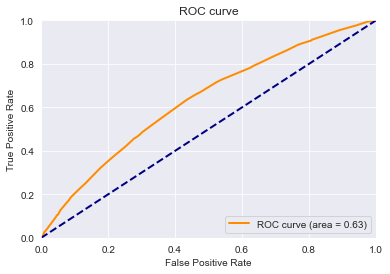

In [49]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# 9. Comparison - Results without WOE

## 9.1 Decision Tree

In [50]:
train_no_woe = train[['AP001', 'AP003', 'AP008','CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014','loan_default']]
test_no_woe = test[['AP001', 'AP003', 'AP008','CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014','loan_default']]
feature_no_woe = ['AP001', 'AP003', 'AP008','CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

In [51]:
dtree_no_woe = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

In [52]:
dtree_no_woe.fit(train_no_woe[feature_no_woe],train_no_woe['loan_default'])

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [53]:
importances = pd.DataFrame({'feature': train_no_woe[feature_no_woe].columns, 'importance': np.round(dtree_no_woe.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009,0.376
1,AP003,0.251
4,CR015,0.090
8,PA029,0.063
14,TD014,0.061
11,TD006,0.036
10,TD005,0.028
7,PA023,0.026
3,CR009,0.024
5,CR019,0.010


<AxesSubplot:xlabel='feature'>

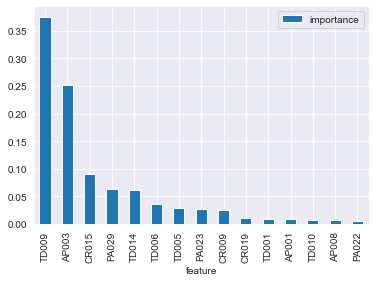

In [54]:
importances.plot.bar(x='feature')

## 9.2 Prediction

In [55]:
predictions_no_woe = dtree_no_woe.predict(test_no_woe[feature_no_woe][0:10])
predictions_no_woe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
dtree_no_woe.predict_proba(test_no_woe[feature_no_woe][0:10])

array([[0.70037581, 0.29962419],
       [0.92503048, 0.07496952],
       [0.85060018, 0.14939982],
       [0.7904401 , 0.2095599 ],
       [0.85060018, 0.14939982],
       [0.89388547, 0.10611453],
       [0.92217484, 0.07782516],
       [0.69287834, 0.30712166],
       [0.92217484, 0.07782516],
       [0.7973819 , 0.2026181 ]])

## 9.3 ROC

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_no_woe = dtree_no_woe.predict_proba(test_no_woe[feature_no_woe])[:,1]
roc_auc_value_no_woe = roc_auc_score(test_no_woe['loan_default'],y_pred_no_woe)
roc_auc_value_no_woe

0.6321827027298892

In [58]:
fpr, tpr, _ = roc_curve(test_no_woe['loan_default'], y_pred_no_woe)
[fpr,tpr]

[array([0.00000000e+00, 7.74953503e-05, 1.08493490e-03, 1.70489771e-03,
        2.40235586e-03, 2.94482331e-03, 4.33973962e-03, 4.33973962e-03,
        4.72721637e-03, 5.50216987e-03, 6.97458153e-03, 2.34810911e-02,
        3.34004960e-02, 3.46404216e-02, 4.06850589e-02, 5.05269684e-02,
        5.06044637e-02, 5.97489151e-02, 6.10663360e-02, 6.14538128e-02,
        6.92033478e-02, 7.98202108e-02, 1.17637942e-01, 1.27712337e-01,
        1.34686919e-01, 1.37941723e-01, 1.64987601e-01, 1.71109733e-01,
        1.88158710e-01, 2.11252325e-01, 2.15359578e-01, 2.27991321e-01,
        2.41010539e-01, 2.44342839e-01, 2.75418475e-01, 2.76658400e-01,
        2.85802852e-01, 2.87197768e-01, 3.04246745e-01, 3.54153751e-01,
        4.33818971e-01, 4.49085555e-01, 4.65514569e-01, 4.81478611e-01,
        4.85740856e-01, 5.02789833e-01, 5.17746435e-01, 5.34097954e-01,
        6.26394916e-01, 6.63282703e-01, 6.90948543e-01, 6.93273404e-01,
        7.15979541e-01, 7.18459392e-01, 7.67668940e-01, 7.677464

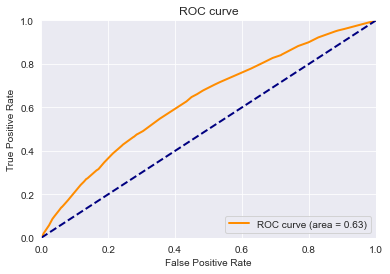

In [59]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()